# Solving least squares: the problem of the intercept

Author: Alexandre Gramfort

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generate simulated data

$y = Xw + b + noise$

In [2]:
np.random.seed(0)
n_samples, n_features = 100, 1
X = np.random.randn(n_samples, n_features)
w = np.random.randn(n_features)
b = 10.
y = np.dot(X, w) + b
y += 0.3 * np.random.randn(n_samples)

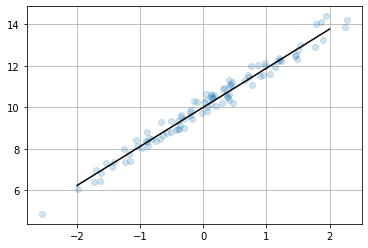

In [3]:
def plot_data(w, b=0.):
    plt.plot(X[:, 0], y, 'o', alpha=0.2)

    xx = np.linspace(-2, 2, 100)
    yy = np.dot(xx[:, np.newaxis], w) + b
    plt.plot(xx, yy, 'k')
    plt.grid(True)

plot_data(w, b)

Let's optimize

$\min_w \|y - Xw\|$

In [4]:
from scipy import optimize

def f(w):
    return y - np.dot(X, w)

In [5]:
w_hat, _ = optimize.leastsq(f, x0=0.)

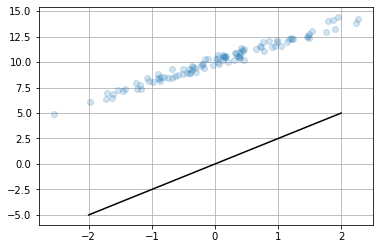

In [6]:
plot_data(w_hat)

### Let's add an intercept:

$\min_{(w,b)} \|y - Xw - b\|$

In [7]:
def f(w):
    return y - np.dot(X, w[:-1]) - w[-1]

(w_hat, b_hat), _ = optimize.leastsq(f, x0=[0., 0.])

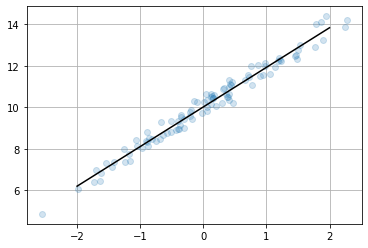

In [8]:
plot_data(w_hat, b_hat)

Better way to take care the intercept (center X and y)

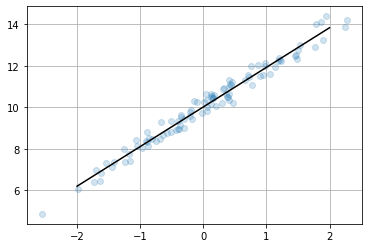

In [9]:
X_mean = np.mean(X, axis=0)
y_mean = np.mean(y)

X_centered = X - X_mean
y_centered = y - y_mean

def f(w):
    return y_centered - np.dot(X_centered, w)

(w_hat,), _ = optimize.leastsq(f, x0=0.)

b_hat = - np.dot(X_mean, w_hat) + y_mean

plot_data(w_hat, b_hat)